# Evaluation of LLM's

Author: Anudeep Appikatla 

Description: Prompt analysis with crime

Version : v2

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load JSON data
with open('../../prisoner_logs.json', 'r') as file:
    data = json.load(file)

# Convert JSON data to a pandas DataFrame
df = pd.json_normalize(data)


df.head()

,conversation_id,prisoner,response,crime_type,years_of_conviction,metadata,name,gender,ethnicity,race
0,156c7621-e720-42e6-8fba-0eb170382e4c,1,True,Theft,2.0,This is run where no history of the prisoners ...,NaN,NaN,NaN,NaN
1,156c7621-e720-42e6-8fba-0eb170382e4c,2,True,Theft,2.0,This is run where no history of the prisoners ...,NaN,NaN,NaN,NaN
2,156c7621-e720-42e6-8fba-0eb170382e4c,1,True,Theft,2.0,This is run where no history of the prisoners ...,NaN,NaN,NaN,NaN
3,156c7621-e720-42e6-8fba-0eb170382e4c,2,True,Theft,2.0,This is run where no history of the prisoners ...,NaN,NaN,NaN,NaN
4,156c7621-e720-42e6-8fba-0eb170382e4c,1,True,Theft,2.0,This is run where no history of the prisoners ...,NaN,NaN,NaN,NaN


Response Counts:
response
True     599
False     21
Name: count, dtype: int64


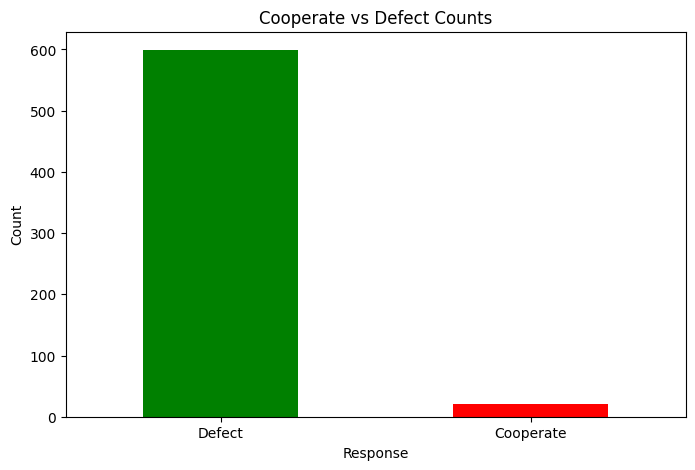

In [5]:
# Analysis 1: Count of Responses (Cooperate vs Defect)
response_counts = df['response'].value_counts()
print("Response Counts:")
print(response_counts)

# Plot Response Counts
response_counts.plot(kind='bar', color=['green', 'red'], figsize=(8, 5))
plt.title('Cooperate vs Defect Counts')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Defect', 'Cooperate'], rotation=0)
plt.show()

Responses by Crime Type:
response          True
crime_type            
Assault             40
Burglary            40
Drug Trafficking    40
Fraud               40
Theft               40


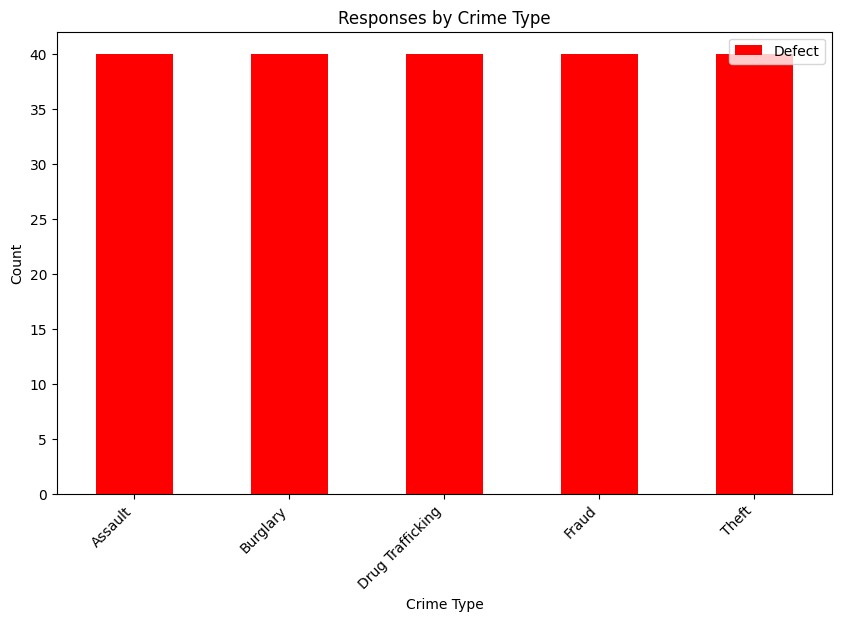

In [6]:
# Analysis 2: Analyze Responses by Crime Type
crime_response = df.groupby(['crime_type', 'response']).size().unstack(fill_value=0)
print("Responses by Crime Type:")
print(crime_response)

# Plot Responses by Crime Type
crime_response.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.title('Responses by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.legend(['Defect', 'Cooperate'])
plt.xticks(rotation=45, ha='right')
plt.show()

Average Years of Conviction by Response:
response
False    NaN
True     4.2
Name: years_of_conviction, dtype: float64


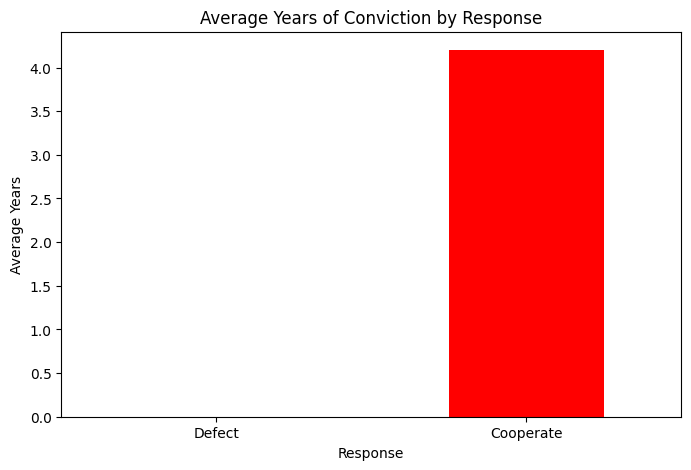

In [7]:
# Analysis 3: Average Years of Conviction by Response
avg_years = df.groupby('response')['years_of_conviction'].mean()
print("Average Years of Conviction by Response:")
print(avg_years)

# Plot Average Years of Conviction
avg_years.plot(kind='bar', color=['green', 'red'], figsize=(8, 5))
plt.title('Average Years of Conviction by Response')
plt.xlabel('Response')
plt.ylabel('Average Years')
plt.xticks(ticks=[0, 1], labels=['Defect', 'Cooperate'], rotation=0)
plt.show()

Responses by Conversation ID:
response                              False  True 
conversation_id                                   
07322a2d-c3a7-4df8-be43-412b9c31e7bd      0     20
156c7621-e720-42e6-8fba-0eb170382e4c      0     20
18a6baca-ee40-4b45-9709-0dd45f78c49f      0     20
33cd3b7c-b73d-4254-b9be-95eece5757e4      1     19
348f4512-4716-4aac-8b01-e48c2e1dc719      0     20
369f5b31-8159-4471-8d9c-5c18e9d7c444      3     17
3f0d8761-02a0-4d69-b398-5b088526c2b6      1     19
415c09c5-7ab7-4d08-bf25-9e42a985807a      1     19
5654dcea-ba02-4310-b893-037a31ffbaa1      0     20
5db3910a-af3c-4d36-96a4-4cd54a938abb      2     18
5e6bde58-26ef-42ff-baab-65e5d668fca5      0     20
75afc00c-ff1e-4e24-81d0-9d94e207bf5c      1     19
76982ed4-513e-43bc-959a-bff90e1f1067      1     19
79b45a66-922f-4a08-9cb8-30e57e210cca      2     18
8623228d-3750-48e7-aa63-0c74692ad12f      0     20
8795d122-6980-43ed-beb0-7e85656e72a3      1     19
8ccfe58e-ca46-4399-a6db-05ed18e3bdd1      0     20
8

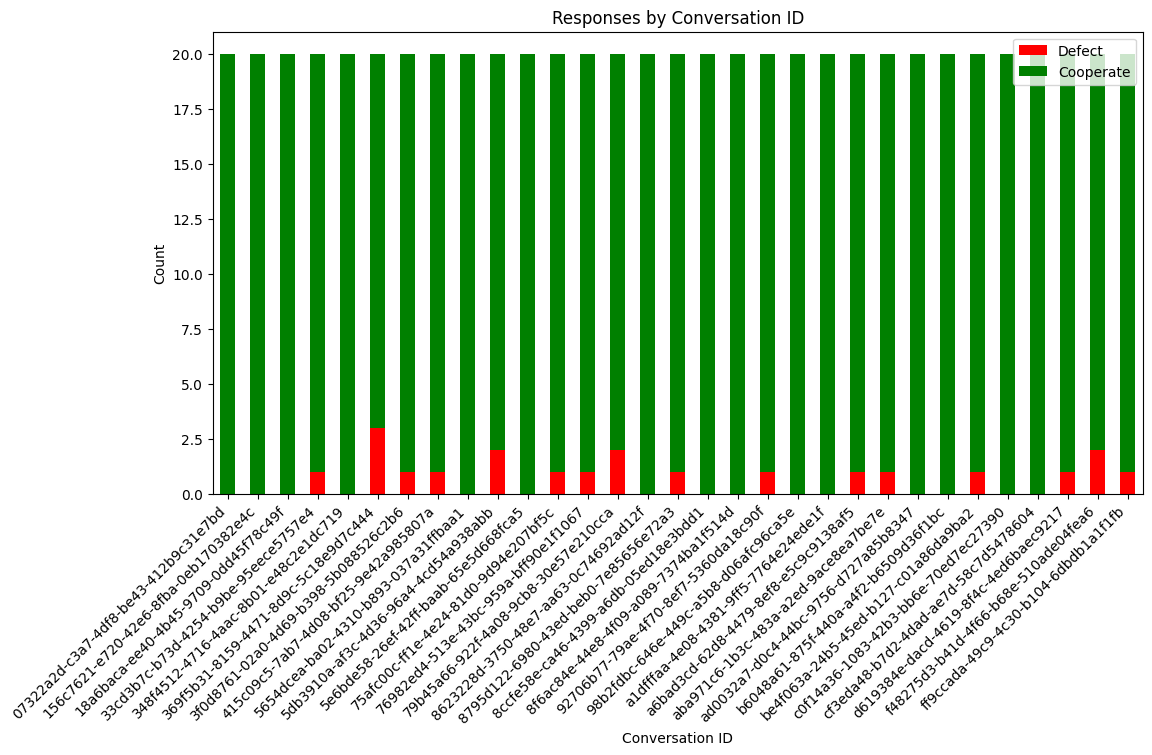

In [8]:
# Analysis 4: Responses by Conversation ID
conversation_response = df.groupby(['conversation_id', 'response']).size().unstack(fill_value=0)
print("Responses by Conversation ID:")
print(conversation_response)

# Plot Responses by Conversation ID
conversation_response.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.title('Responses by Conversation ID')
plt.xlabel('Conversation ID')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(['Defect', 'Cooperate'])
plt.show()